In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

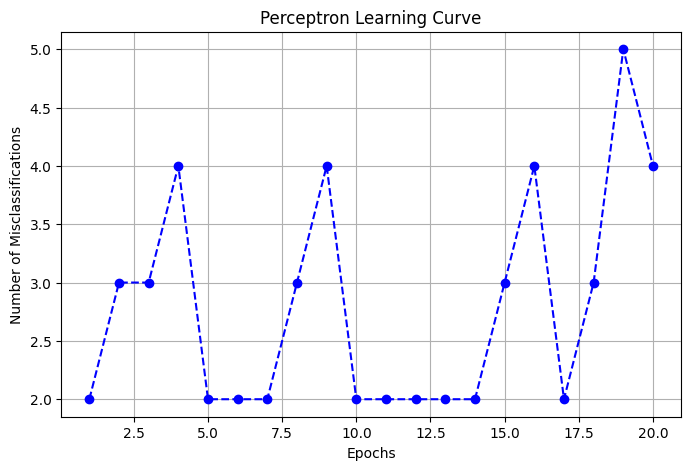

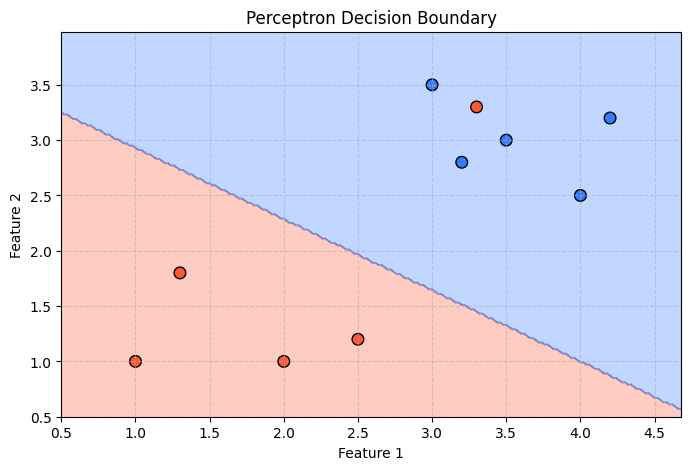

Part A — Scratch Perceptron (Small Dataset)
Confusion Matrix:
[[4 1]
 [0 5]]

Precision: 0.83
Recall: 1.00
F1-Score: 0.91
AUC: 0.88


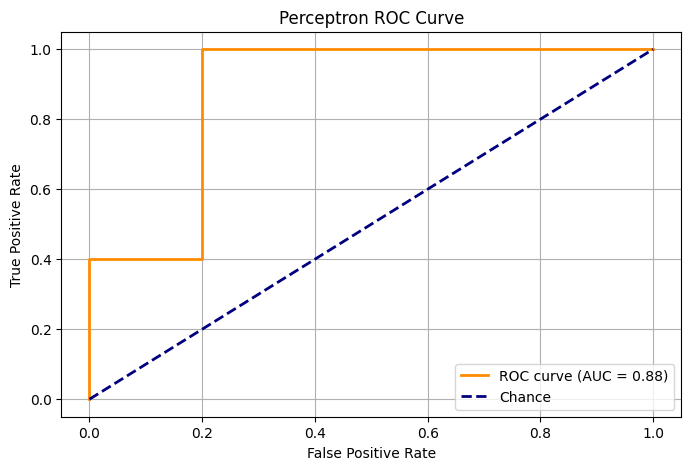

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_fscore_support

# --- Dataset (Unchanged) ---
X_small = np.array([
    [1.0, 1.0], [1.3, 1.8], [2.0, 1.0], [3.3, 3.3], [2.5, 1.2],
    [3.0, 3.5], [3.2, 2.8], [3.5, 3.0], [4.0, 2.5], [4.2, 3.2]
])
y_small = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

class ScratchPerceptron:
    def __init__(self, learning_rate=0.1, n_epochs=20):
        self.lr = learning_rate
        self.n_epochs = n_epochs
        self.weights = None
        self.bias = None
        self.errors_ = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0.0

        for _ in range(self.n_epochs):
            errors = 0
            for xi, target in zip(X, y):
                linear_output = np.dot(xi, self.weights) + self.bias
                prediction = 1 if linear_output >= 0.0 else 0
                update = self.lr * (target - prediction)
                self.weights += update * xi
                self.bias += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.weights) + self.bias

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

    def decision_function(self, X):
        return self.net_input(X)
def plot_decision_boundary(X, y, classifier, title):
    plt.figure(figsize=(8, 5))
    cmap = ListedColormap(['#FF5733', '#337BFF']) 
    
    # Define the region of the plot
    x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, marker='o', edgecolor='k', s=70)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

scratch = ScratchPerceptron(learning_rate=0.1, n_epochs=20)
scratch.fit(X_small, y_small)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(scratch.errors_) + 1), scratch.errors_, marker='o', color='b', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.title('Perceptron Learning Curve')
plt.grid(True)
plt.show()
plot_decision_boundary(X_small, y_small, scratch, 'Perceptron Decision Boundary')

y_pred_small = scratch.predict(X_small)
cm_small = confusion_matrix(y_small, y_pred_small)
precision, recall, f1, _ = precision_recall_fscore_support(
    y_small, y_pred_small, average='binary'
)

print("="*40)
print("Part A — Scratch Perceptron (Small Dataset)")
print("="*40)
print(f"Confusion Matrix:\n{cm_small}\n")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

decision_scores = scratch.decision_function(X_small)
fpr, tpr, _ = roc_curve(y_small, decision_scores)
roc_auc_small = auc(fpr, tpr)
print(f"AUC: {roc_auc_small:.2f}")

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_small:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Perceptron ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()